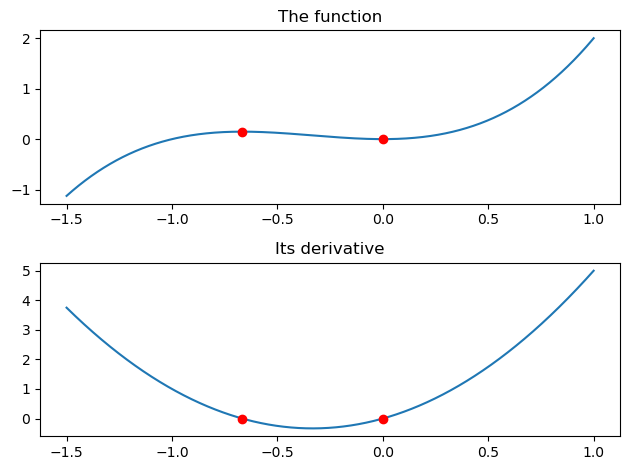

In [ ]:
########### FINDING CRITICAL POINTS #################

import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

x = np.linspace(-1.5, 1, 10001)

fx = x**3 + x**2
# print(x[0]**3)
# print(x[0]**2)
# print(fx[0])

difference_between_x = np.mean(np.diff(x)) # another way to get the difference between all the x values if using linspace (they're all the same and np.mean extracts it as one value instead of a numpy array of that value over and over)
# the empirical derivative (discrete difference)
df = np.diff(fx) / difference_between_x


x_indices = find_peaks(-np.abs(df))[0] # gives us the indices in df where the peaks occur, we flip abs upside down with -np.abs() so the peaks are the lowest points
critical_points = x[x_indices] # the x input critical points to the function that have critical values (y) 
critical_values = fx[x_indices]

_,axs = plt.subplots(2,1)
axs[0].plot(x,fx)
axs[0].plot(critical_points, critical_values, 'ro')
axs[0].set_title('The function')

axs[1].plot(x[:-1],df) # don't use last point since it causes size mismatch error with the np.diff in df which has an extra point due to the diff logic
axs[1].plot(critical_points, df[x_indices], 'ro') # plot the critical points on the derivative plot
axs[1].set_title('Its derivative')

plt.tight_layout()
plt.show()

(array([], dtype=int64),)


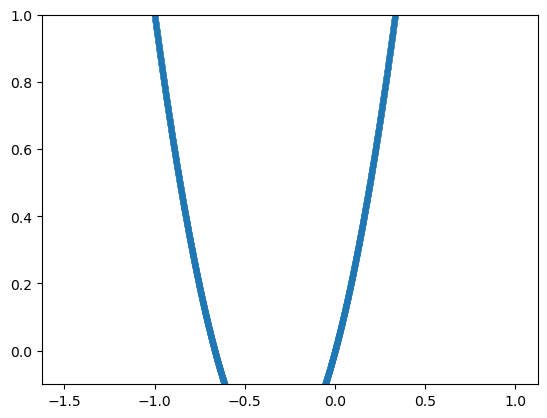

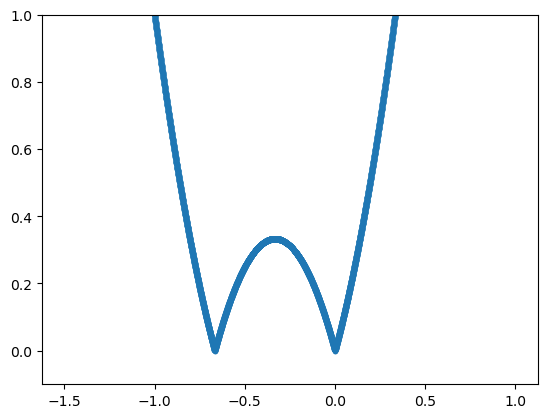

In [ ]:
# Find the critical points in the function by solving for x when the derivative = 0

# note that there are no zeros exactly in df (the derivatives) due to numpy calculations and spacing in linspace
zeros = np.where(df==0)
print(zeros) # []

# To find the points on the derivative plot where the derivative is 0, take the absolute value of the derivatives
# this makes it easier to find the minima (i.e. lowest points closest to 0)
plt.plot(x[:-1],df,'.') # without using absolute value the derivatives go above and below zero
plt.ylim([-.1,1])
plt.show()

 # using absolute value we can easily find the points that are lowest and closest to zero (removes negative y values)
plt.plot(x[:-1],np.abs(df),'.')
plt.ylim([-.1,1])
plt.show()


In [ ]:
# Use the scipy find_peaks function to find the minima now that we have the derivatives all 0 or above:

from scipy.signal import find_peaks

# find peaks finds the local maxima, so we just need to flip it upside down to get the minima (make np.abs negative)
x_indices = find_peaks(-np.abs(df))[0] # gives us the indices in df where the peaks occur
critical_points = x[x_indices] # the x input critical points to the function that have critical values (y) 

print(critical_points) # x values that have an output in the function that are 0 (or close to it since numpy)

critical_values = fx[x_indices]

for xx,yy in zip(critical_points, critical_values):
    # critical point = x input, critical value = y output
    print(f'Critical point/value: ({xx:.3f},{yy:.3f})')


[-6.6675e-01 -2.5000e-04]
Critical point/value: (-0.667,0.148)
Critical point/value: (-0.000,0.000)


In [ ]:
#####################################
#   CRITICAL POINTS USING SYMPY
#####################################

x = sym.symbols('x')

fx = x**2 + x**3

df = sym.diff(fx,x) # derivative with respect to x
display(df)

# find critical points where f'=0
solve_for_zero = sym.Eq(df,0) # use .Eq to set the result of the derivative to 0 so we can use it for sympy to solve for
display(solve_for_zero)
critical_points = sym.solve(solve_for_zero) # note: by default if passing equation directly, solves for x=0

for cp in critical_points:
    critical_value = fx.subs(x,cp) # plug in critical point to get the value in the function,
    print(f'Critical Point/Value: ({cp},{critical_value})')

3*x**2 + 2*x

Eq(3*x**2 + 2*x, 0)

[-2/3, 0]

Critical Point/Value: (-2/3,4/27)
Critical Point/Value: (0,0)


'The Piecewise Function:'

Piecewise((x**2, x < 1), (-x**2, True))

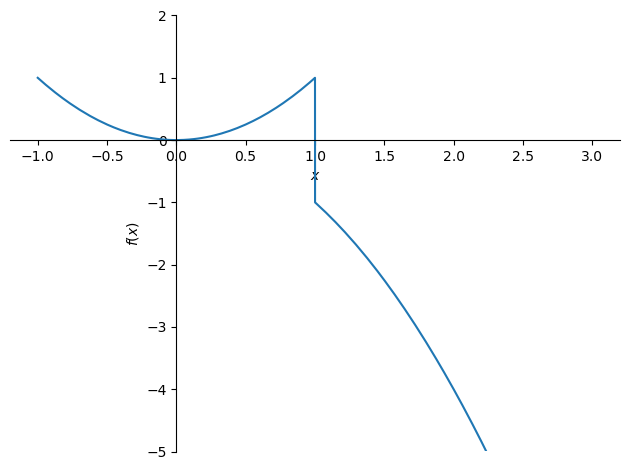

'The Piecewise Derivative:'

Piecewise((2*x, x < 1), (-2*x, True))

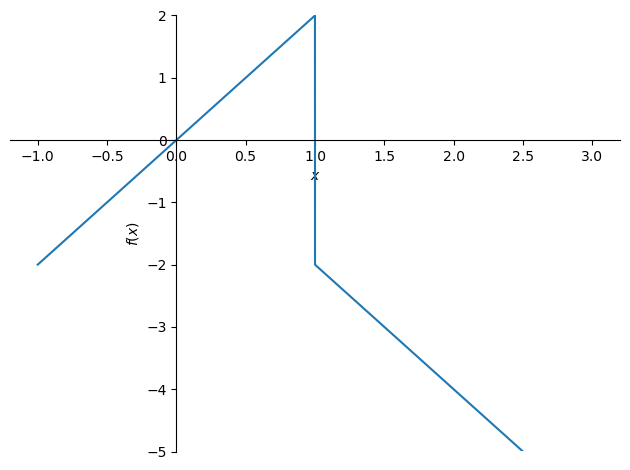

In [ ]:
#### FINDING ALL CRITICAL POINTS WHERE THE DERIVATIVE MIGHT NOT BE ZERO #####

### Note that you can't always naively just get points where the derivative = 0
# There are cases where the derivative could be undefined and that won't find those critical points!

x = sym.symbols('x')

bound = 1 # boundary

# piecewise function that has a jump discontinuity where the derivative is undefined (and not 0)
# Note that the function is STILL DEFINED at the jump discontinuity, but the derivative is not, 
#   so we need to look for that point as a critical point without checking for a 0 derivative as we have before
fx = sym.Piecewise(
    (x**2, x < bound),
    (-x**2, x >= bound) # there is a jump discontinuity at x=1
)

# get the derivatives
df = sym.diff(fx)

display('The Piecewise Function:')
display(fx)
sym.plot(fx, (x,-1,3), ylim=[-5,2]) # note that the vertical line is an artifact of sympy's plotting engine and does not exist - there is a discontinuity there

display('The Piecewise Derivative:')
display(df)
sym.plot(df, (x,-1,3), ylim=[-5,2])

In [ ]:
# Find the critical points for the piecewise function
  # including the point at the boundary where the derivative is undefined

critical_points = sym.solve(df) # defaults to solving for x=0 without using sym.Eq if fn is passed directly in
display(critical_points) # this shows the critical point where the derivative is 0, but not the other

# get left and right limits around the discontinuity
limit_left = sym.limit(fx, x, bound, dir='-') # left limit as x approaches the boundary of 1
limit_right = sym.limit(fx, x, bound, dir='+')
# note - due to a bug the limits are the same and not correct - sympy has a problem with piecewise limits
# they should be 1 and -1/2

# the limit is -1 for the left and -1/2 for the right limit
# Since the limits are different, that means that there is a discontinuity
display(limit_left,limit_right)
# make sure the function is not undefined at that point
print('Function value')
display(fx.subs(x, bound))

# If the derivative is undefined (mismatched left/right limits), then that is a critical point
if limit_left != limit_right:
    critical_points.append(bound) # this should add 1 to the critical points list, but due to sympy bug does not work

print(critical_points)



[0]

-1

-1

Function value


-1

[0]
